In [ ]:
# initial imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
loan = pd.read_csv('data/train.csv', index_col=0)
test = pd.read_csv('data/test.csv', index_col=0)
submission = pd.read_csv('data/sample_submission.csv', index_col=0)
loan.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
193981,23703.70,0.116,740,11349.93,9.91,Female,Single,Master's,Employed,Other,B4,1.0
541455,24430.76,0.154,658,11706.56,14.37,Male,Single,Bachelor's,Employed,Debt consolidation,D4,1.0
37802,74988.99,0.063,739,17574.19,9.11,Male,Single,Bachelor's,Self-employed,Education,C2,1.0
313032,26649.66,0.204,661,6281.75,9.98,Female,Single,High School,Employed,Debt consolidation,D4,1.0
312223,36092.04,0.093,732,23489.57,11.26,Female,Married,Bachelor's,Employed,Home,C3,1.0


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356396 entries, 193981 to 121958
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         356396 non-null  float64
 1   debt_to_income_ratio  356396 non-null  float64
 2   credit_score          356396 non-null  int64  
 3   loan_amount           356396 non-null  float64
 4   interest_rate         356396 non-null  float64
 5   gender                356396 non-null  object 
 6   marital_status        356396 non-null  object 
 7   education_level       356396 non-null  object 
 8   employment_status     356396 non-null  object 
 9   loan_purpose          356396 non-null  object 
 10  grade_subgrade        356396 non-null  object 
 11  loan_paid_back        356396 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 35.3+ MB


In [ ]:
np.sum(loan.isna())
    # no null values

c:\Users\yafas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [ ]:
loan.describe().T.round(2)
    # seems like annual income is a little right skewed, most people are low earning
    # debt_to_income_ratio is a little right skewed, most people have low debt
    # credit_score seems normally distributed
    # loan amount, interest rate 

,count,mean,std,min,25%,50%,75%,max
annual_income,356396.0,48215.21,26687.90,6008.56,27897.19,46552.49,60993.22,393381.74
debt_to_income_ratio,356396.0,0.12,0.07,0.01,0.07,0.10,0.16,0.63
credit_score,356396.0,680.90,55.49,395.00,646.00,682.00,719.00,849.00
loan_amount,356396.0,15025.76,6928.54,500.09,10279.82,15000.80,18887.85,48954.70
interest_rate,356396.0,12.36,2.01,3.81,10.99,12.37,13.68,20.84
loan_paid_back,356396.0,0.80,0.40,0.00,1.00,1.00,1.00,1.00


In [ ]:
feats = loan.columns[:-1]
    # ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
num_feats = feats[:5]
    # ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
cat_feats = feats[5:]
    # ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
target = loan.columns[-1]
    # 'loan_paid_back'

(array([ 71437.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 284959.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

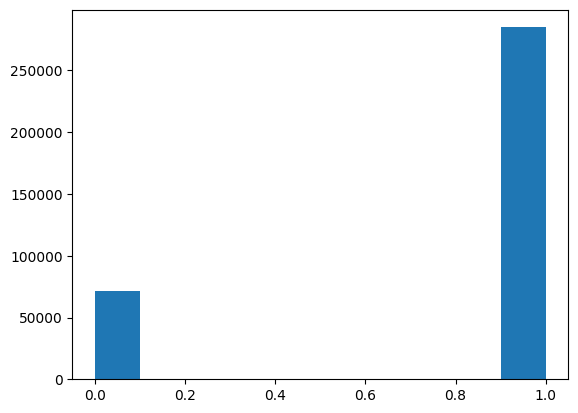

In [21]:
plt.hist(loan[target])